## Lesson 01: Time Series as Supervised Learning 

## Lesson 02: Load Time Series Data

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

series = pd.read_csv("./data/daily-births.csv", header=0, parse_dates=[0],index_col=0)

In [2]:
print(series.head(10))

            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44
1959-01-06      29
1959-01-07      45
1959-01-08      43
1959-01-09      38
1959-01-10      27


In [3]:
series.size,\
series.shape

(365, (365, 1))

In [4]:
type(series)

pandas.core.frame.DataFrame

In [5]:
print(series.loc["1959-01"])

            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44
1959-01-06      29
1959-01-07      45
1959-01-08      43
1959-01-09      38
1959-01-10      27
1959-01-11      38
1959-01-12      33
1959-01-13      55
1959-01-14      47
1959-01-15      45
1959-01-16      37
1959-01-17      50
1959-01-18      43
1959-01-19      41
1959-01-20      52
1959-01-21      34
1959-01-22      53
1959-01-23      39
1959-01-24      32
1959-01-25      37
1959-01-26      43
1959-01-27      39
1959-01-28      35
1959-01-29      44
1959-01-30      38
1959-01-31      24


In [6]:
print(series.describe())

           Births
count  365.000000
mean    41.980822
std      7.348257
min     23.000000
25%     37.000000
50%     42.000000
75%     46.000000
max     73.000000


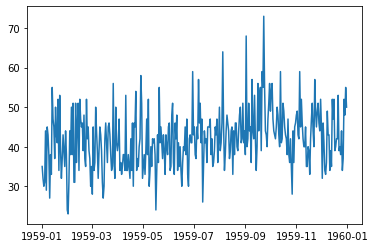

In [7]:
plt.plot(series)
plt.show()

## Lesson 03: Data Visualization

In [88]:
series = pd.read_csv("./data/shampoo-sales.csv", header=0, parse_dates=True, squeeze=True)

In [61]:
def change_date(x):
    
    return "200"+x

In [89]:
series["Month"] = series.apply(lambda x: change_date(x["Month"]), axis=1)
series["Month"] = pd.to_datetime(series["Month"], format="%Y-%m")
series.set_index("Month", inplace=True)
series = series.squeeze()

# 1. Line Plots

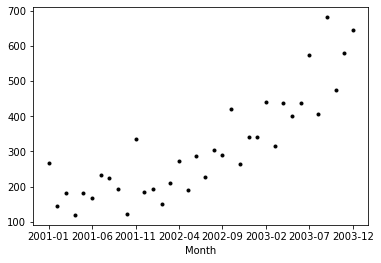

In [63]:
series.plot(style="k.")
plt.show()

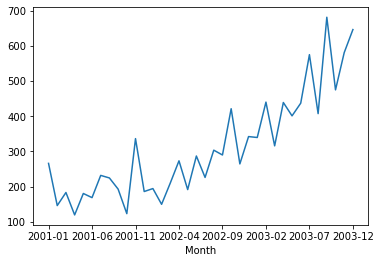

In [64]:
series.plot()
plt.show()

### 2. Histograms and Density Plots

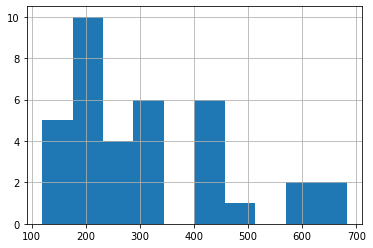

In [65]:
series.hist()
plt.show()

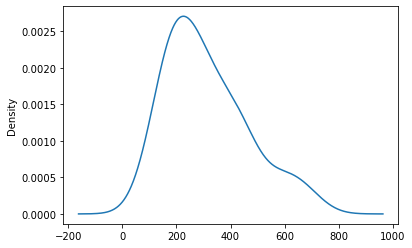

In [66]:
series.plot(kind="kde")
plt.show()

### 3. Box ans Whisker Plots by year or quarter

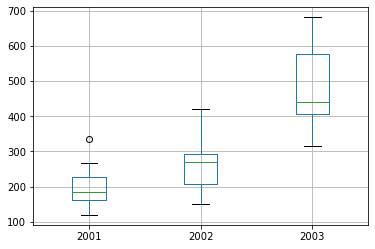

In [91]:
groups = series.groupby(pd.Grouper(freq="A"))
years = pd.DataFrame()
for name, group in groups:
    years[name.yeabr] = group.values
years.boxplot()
plt.show()

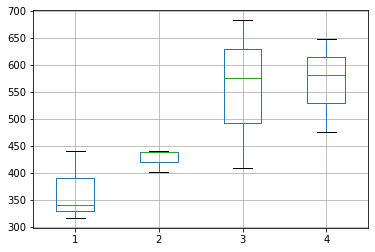

In [97]:
groups = series.groupby(pd.Grouper(freq="Q"))
quarters = pd.DataFrame()
for name, group in groups:
    quarters[name.quarter] = group.values
quarters.boxplot()
plt.show()

### 4. Heat Maps

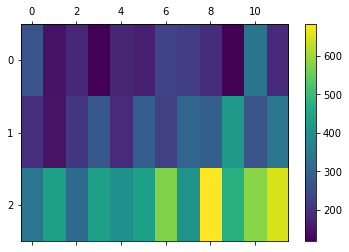

In [103]:
groups = series.groupby(pd.Grouper(freq="A"))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years = years.T
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(years, interpolation=None, aspect="auto")
fig.colorbar(cax)
plt.show()

### 5. Lag Plots or Scatter Plots

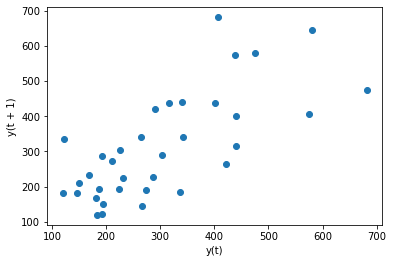

In [105]:
pd.plotting.lag_plot(series)
plt.show()

### 6. Autocorrelation Plots

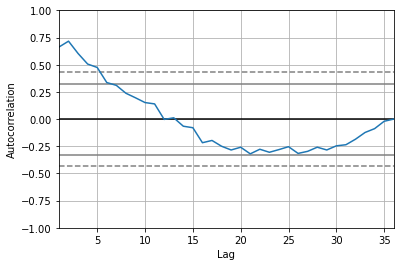

In [106]:
pd.plotting.autocorrelation_plot(series)
plt.show()

## Lesson 04: Persistence Forecast Model

In [153]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt
plt.rcParams["figure.figsize"] = [12, 5]

Write code to load the dataset and use the persistence forecast to make a prediction for each time step in the dataset. Note, that you will not be able to make a forecast for the first time step in the dataset as there is no previous observation to use.

In [144]:
series = pd.read_csv("./data/daily-births.csv", header=0, parse_dates=[0], index_col=0, squeeze=True)

In [146]:
values  = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ["t-1", "t+1"]
dataframe.head()

,t-1,t+1
0,NaN,35
1,35.0,32
2,32.0,30
3,30.0,31
4,31.0,44


In [124]:
X_train, X_test, y_train, y_test = train_test_split(dataframe[1:]["t-1"], dataframe[1:]["t+1"], train_size=0.66, shuffle=False)

In [147]:
X = dataframe.values
train_size = int(len(X)*0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [137]:
# persistence model
def model_persistence(x):
    return x

In [150]:
len(test_y)

125

In [151]:
predictions = []
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
rmse = sqrt(mean_squared_error(test_y, predictions))
rmse

9.151174787971215

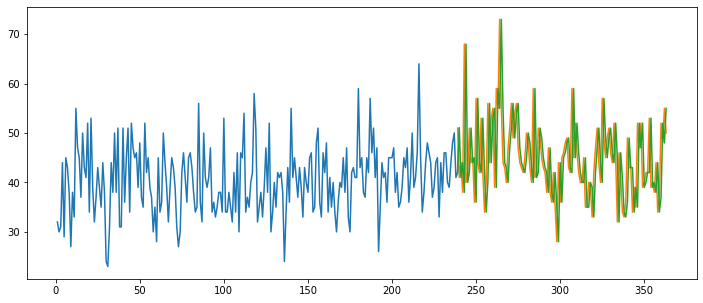

In [154]:
plt.plot(y_train)
plt.plot([None for i in train_y] + [x for x in test_y])
plt.plot([None for i in train_y] + [x for x in predictions])
plt.show()

## Lesson 05: Autoregressive Forecast Model

## Lesson 06: ARIMA Forecast Model

## Lesson 07: Hello World End-to-End Project